## Fig 2: ORF8 KO'ed more than any other gene

In [15]:
import os
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as asns
import scipy.stats as st

In [16]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions')

In [17]:
## Matplot lib settings
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 14
mpl.rcParams['legend.fontsize']=12
mpl.rcParams['legend.title_fontsize']=14

In [18]:
## Pretty colors
from pylab import *

cmap = cm.get_cmap('tab20')    # PiYG

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))


#1f77b4
#aec7e8
#ff7f0e
#ffbb78
#2ca02c
#98df8a
#d62728
#ff9896
#9467bd
#c5b0d5
#8c564b
#c49c94
#e377c2
#f7b6d2
#7f7f7f
#c7c7c7
#bcbd22
#dbdb8d
#17becf
#9edae5


In [19]:
cdict = {
    'ORF1a':'#1f77b4',
    'ORF1b':'#aec7e8',
    'S':'#2ca02c',
    'ORF3a':'#ff7f0e',
    'E': '#e377c2',
    'M': '#bcbd22',
    'ORF6':'#ff9896',
    'ORF7a':'#9467bd',
    'ORF7b':'#c5b0d5',
    'ORF8':'#d62728',
    'N':'#8c564b',
    'ORF9b':'#17becf'
}

In [20]:
ko_df = pd.read_csv('wa_results/gisaid.washington_ko_meta.tsv',sep='\t')
ko_df_ampl = pd.read_csv('wa_results/gisaid.washington_ko_withAmplicons_meta.tsv',sep='\t')
ref = SeqIO.read('params/sars2_ref.gb','gb')
ref_all = SeqIO.read('params/sars2_allgenes_ref.gb','gb')
gb_ko = pd.read_csv('wa_results/genbank_wa_ko_meta.tsv',sep='\t')
ko_all = pd.read_csv('wa_results/gisaid.washington_ko_nsp.tsv',sep='\t')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/2932784396.py:1: DtypeWarning: Columns (50,60,152,178) have mixed types. Specify dtype option on import or set low_memory=False.
  ko_df = pd.read_csv('wa_results/gisaid.washington_ko_meta.tsv',sep='\t')
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/2932784396.py:2: DtypeWarning: Columns (50,60,152,178) have mixed types. Specify dtype option on import or set low_memory=False.
  ko_df_ampl = pd.read_csv('wa_results/gisaid.washington_ko_withAmplicons_meta.tsv',sep='\t')
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/2932784396.py:5: DtypeWarning: Columns (20,50,179) have mixed types. Specify dtype option on import or set low_memory=False.
  gb_ko = pd.read_csv('wa_results/genbank_wa_ko_meta.tsv',sep='\t')
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/2932784396.py:6: DtypeWarning: Columns (20,30,40,50,60,70,72,80,82,90,100,102,110,120,130,140,150,190,200,212,220,230,24

In [21]:
len(ko_all)

149535

In [22]:
len(ko_df)

149535

In [23]:
ko_all = pd.merge(ko_all,ko_df[['strain','coverage']])

In [24]:
genes = [feature.qualifiers['gene'][0] for feature in ref.features if feature.type == "CDS"]

In [25]:
genes_all = [feature.qualifiers['gene'][0] for feature in ref_all.features if feature.type == "CDS"]

In [26]:
genes_all

['Nsp1',
 'Nsp2',
 'Nsp3',
 'Nsp4',
 'Nsp5',
 'Nsp6',
 'Nsp7',
 'Nsp8',
 'Nsp9',
 'Nsp10',
 'Nsp12',
 'Nsp13',
 'Nsp14',
 'Nsp15',
 'Nsp16',
 'ORF1a',
 'ORF1b',
 'S',
 'S1',
 'S2',
 'ORF3a',
 'E',
 'M',
 'ORF6',
 'ORF7a',
 'ORF7b',
 'ORF8',
 'N',
 'ORF9b']

In [27]:
def plot_bar_nsp(df, koType,ylab,ref,cov=0.95,path=None,norm=True):
    fig, ax = plt.subplots(tight_layout=True,figsize=(6,2))
    kos = []
    genes = []
    lengths = []
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            if 'Nsp' in name:
                start = feature.location.start
                end = feature.location.end
                if name == 'Nsp12':
                    length = len(ref.seq[13441:13468].translate(to_stop=True) + ref.seq[13467:16236].translate(to_stop=True))
                else:
                    length = len(ref.seq[start:end].translate(to_stop=True))
                ko = df[df.coverage>=cov][name+'_koType']
                kos.append(len(ko[(ko==koType)]))
                genes.append(name)
                lengths.append(length)
    heights = np.asarray(kos)
    lengths = np.asarray(lengths)
    if norm == True:
        heights = 1000*heights/(lengths*len(df))/3
    ax.bar(genes,heights,edgecolor='k',facecolor='#bec2cb',alpha=0.75)
    ax.set_ylabel(ylab)
    ax.set_xticklabels(genes,rotation=90)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')
    return dict(zip(genes,heights)),dict(zip(genes,lengths))



/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/3367621720.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


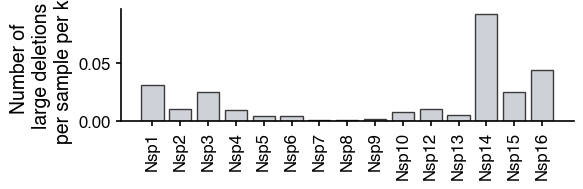

In [28]:
deletions,lengths = plot_bar_nsp(ko_all,'BigDeletion','Number of \nlarge deletions\nper sample per kb',ref_all,norm=True,path='figs/supplemental/nsp_largedeletions_norm.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/3367621720.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


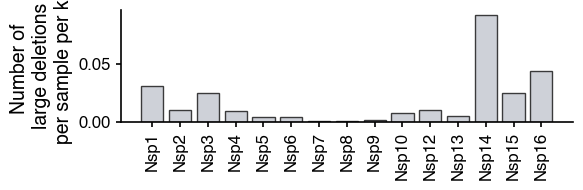

In [29]:
deletions,lengths = plot_bar_nsp(ko_all,'BigDeletion','Number of \nlarge deletions\nper sample per kb',ref_all,norm=True,path='figs/supplemental/nsp_largedeletions_norm.jpg')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/3367621720.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


({'Nsp1': 0.030762028956431608,
  'Nsp2': 0.0102791660067491,
  'Nsp3': 0.024585784627002377,
  'Nsp4': 0.009442605410104658,
  'Nsp5': 0.004312570129347237,
  'Nsp6': 0.0047349849668070635,
  'Nsp7': 0.0011548517942435472,
  'Nsp8': 0.0008668848739735155,
  'Nsp9': 0.0019332299844365122,
  'Nsp10': 0.007793945403412449,
  'Nsp12': 0.010521409885188673,
  'Nsp13': 0.0049626943914376385,
  'Nsp14': 0.09157631753523421,
  'Nsp15': 0.024726620410233834,
  'Nsp16': 0.04395430457834649},
 {'Nsp1': 180,
  'Nsp2': 638,
  'Nsp3': 1945,
  'Nsp4': 500,
  'Nsp5': 306,
  'Nsp6': 290,
  'Nsp7': 83,
  'Nsp8': 198,
  'Nsp9': 113,
  'Nsp10': 139,
  'Nsp12': 932,
  'Nsp13': 601,
  'Nsp14': 527,
  'Nsp15': 346,
  'Nsp16': 298})

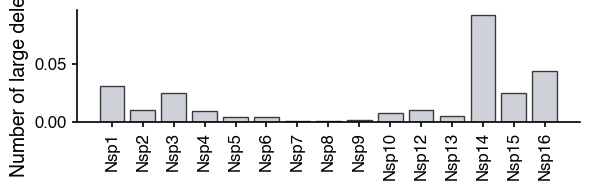

In [30]:
plot_bar_nsp(ko_all,'BigDeletion','Number of large deletions',ref_all,norm=True)

In [31]:
def plot_bar(df, koType,ylab,log=False,cov=0.95,norm=False,path=None,colordict=cdict):
    fig, ax = plt.subplots(tight_layout=True)
    genes = []
    kos = []
    lengths = []
    colors = []
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            if koType:
                ko = df[df.coverage>=cov][name+'_koType']
                kos.append(len(ko[(ko==koType)]))
            else:
                ko = df[df.coverage>=cov][name+'_ko']
                kos.append(len(ko[ko=='Yes']))
            genes.append(name)
            lengths.append(length)
            colors.append(colordict[name])
    heights = np.asarray(kos)
    lengths = np.asarray(lengths)
    if norm == True:
        heights = 1000*heights/(lengths*len(df))/3
    ax.bar(genes,heights,color=colors,edgecolor='k',alpha=0.75)
    ax.set_ylabel(ylab)
    ax.set_xticklabels(genes,rotation=90)
    if log == True:
        ax.set_yscale('log')
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')
    return dict(zip(genes,heights))
        
def load_clusters(path):
    dataList = []
    for gene in genes:
        with open(path+'/clusters_'+gene+'.tsv','r') as f:
            df = pd.read_csv(f,sep='\t')
        values,counts = np.unique(df.cluster,return_counts=True)
        countDF = pd.DataFrame({'cluster':values,'clustSize':counts})
        typeDF = df[[gene+'_koType','cluster']].drop_duplicates().rename(columns={gene+'_koType':'koType'})
        df = df[['cluster','depth']].drop_duplicates().merge(countDF).merge(typeDF)
        df['gene'] = gene
        #data.append(counts)
        dataList.append(df)

    data = pd.concat(dataList)
    return data

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 289,
 'ORF1b': 72,
 'S': 37,
 'ORF3a': 538,
 'E': 1,
 'M': 11,
 'ORF6': 57,
 'ORF7a': 952,
 'ORF7b': 464,
 'ORF8': 13410,
 'N': 51,
 'ORF9b': 118}

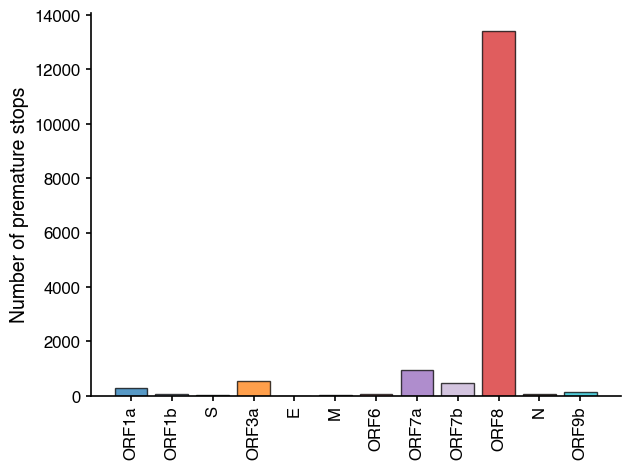

In [32]:
#plot_bar(ko_df,'BigDeletion','Number of large deletions',path='figs/fig2/ko_bigdeletion.pdf')
plot_bar(ko_df_ampl,'earlyStop','Number of premature stops',norm=False,path='figs/supplemental/ko_earlyStop_ampl.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 289,
 'ORF1b': 72,
 'S': 37,
 'ORF3a': 538,
 'E': 1,
 'M': 11,
 'ORF6': 57,
 'ORF7a': 952,
 'ORF7b': 464,
 'ORF8': 13412,
 'N': 51,
 'ORF9b': 118}

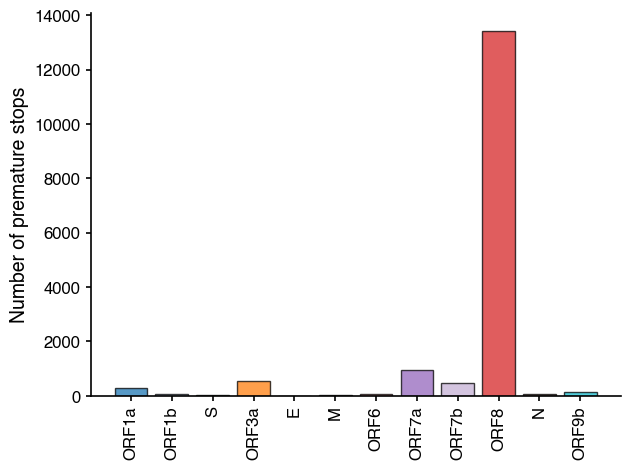

In [33]:
#plot_bar(ko_df,'BigDeletion','Number of large deletions',path='figs/fig2/ko_bigdeletion.pdf')
plot_bar(ko_df,'earlyStop','Number of premature stops',norm=False,path='figs/supplemental/ko_earlyStop.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 1,
 'ORF1b': 0,
 'S': 3,
 'ORF3a': 420,
 'E': 0,
 'M': 0,
 'ORF6': 63,
 'ORF7a': 703,
 'ORF7b': 216,
 'ORF8': 10327,
 'N': 0,
 'ORF9b': 70}

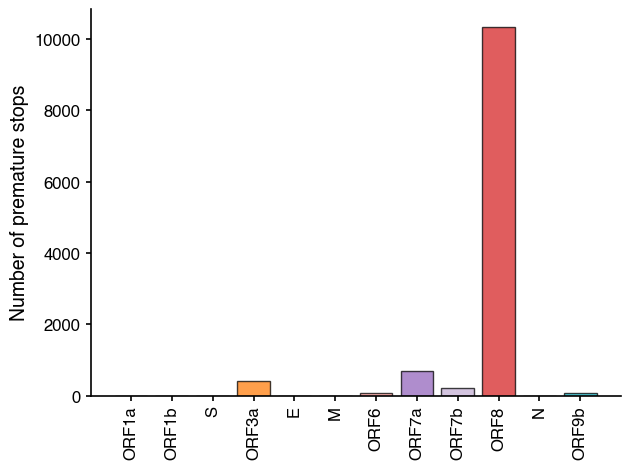

In [34]:
#plot_bar(ko_df,'BigDeletion','Number of large deletions',path='figs/fig2/ko_bigdeletion.pdf')
plot_bar(gb_ko,'earlyStop','Number of premature stops',norm=False,path='figs/supplemental/ko_earlyStop_genbank.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 0.01248385129349999,
 'ORF1b': 0.02354939975850513,
 'S': 0.04637751385584043,
 'ORF3a': 0.004125921670309272,
 'E': 0.022499377700501182,
 'M': 0.1723661669493749,
 'ORF6': 0.02594564095873894,
 'ORF7a': 0.12164431500737687,
 'ORF7b': 0.23120769994217216,
 'ORF8': 0.04428788933480751,
 'N': 0.027228401680851052,
 'ORF9b': 0.01482258230755893}

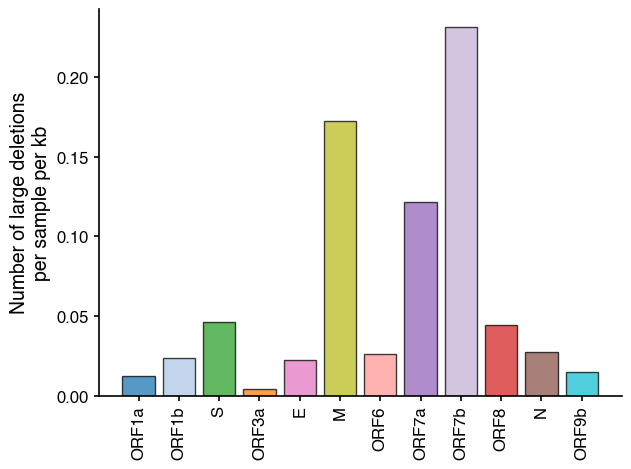

In [49]:
#plot_bar(ko_df,'BigDeletion','Number of large deletions',path='figs/fig2/ko_bigdeletion.pdf')
plot_bar(ko_df_ampl,'BigDeletion','Number of large deletions\nper sample per kb',norm=True,path='figs/supplemental/ko_bigdeletion_norm.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 0.011329686729192469,
 'ORF1b': 0.02251784422893909,
 'S': 0.04234174331740675,
 'ORF3a': 0.003846750426554987,
 'E': 0.024983196318701203,
 'M': 0.1264503218900613,
 'ORF6': 0.024156616242908765,
 'ORF7a': 0.11855087958138004,
 'ORF7b': 0.16852980113339178,
 'ORF8': 0.0270226269634028,
 'N': 0.022004277210950458,
 'ORF9b': 0.014199843609830514}

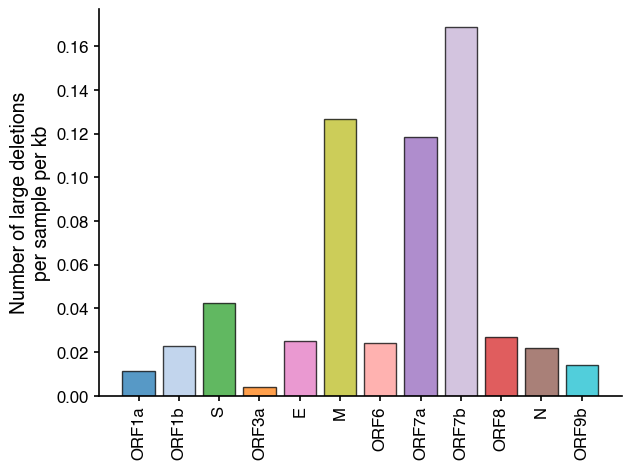

In [50]:
#plot_bar(ko_df,'BigDeletion','Number of large deletions',path='figs/fig2/ko_bigdeletion.pdf')
plot_bar(gb_ko,'BigDeletion','Number of large deletions\nper sample per kb',norm=True,path='figs/supplemental/ko_bigdeletion_norm_genbank.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 24647,
 'ORF1b': 28471,
 'S': 26485,
 'ORF3a': 509,
 'E': 757,
 'M': 17166,
 'ORF6': 710,
 'ORF7a': 6603,
 'ORF7b': 4460,
 'ORF8': 2404,
 'N': 5118,
 'ORF9b': 645}

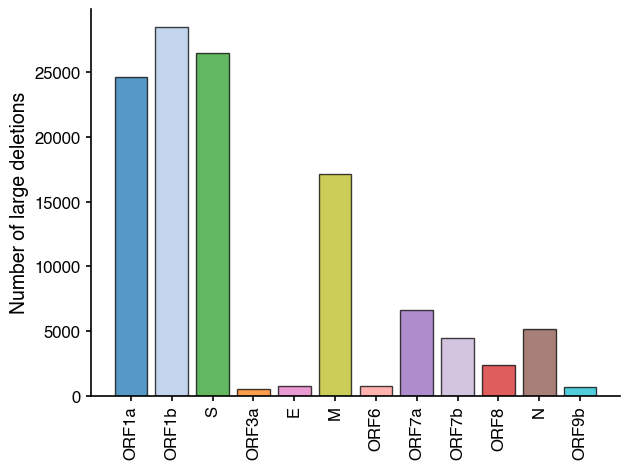

In [51]:
plot_bar(ko_df_ampl,'BigDeletion','Number of large deletions',norm=False,path='figs/supplemental/ko_bigdeletion.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 0.01248385129349999,
 'ORF1b': 0.02354939975850513,
 'S': 0.04637751385584043,
 'ORF3a': 0.004125921670309272,
 'E': 0.022499377700501182,
 'M': 0.1723661669493749,
 'ORF6': 0.02594564095873894,
 'ORF7a': 0.12164431500737687,
 'ORF7b': 0.23120769994217216,
 'ORF8': 0.04428788933480751,
 'N': 0.027228401680851052,
 'ORF9b': 0.01482258230755893}

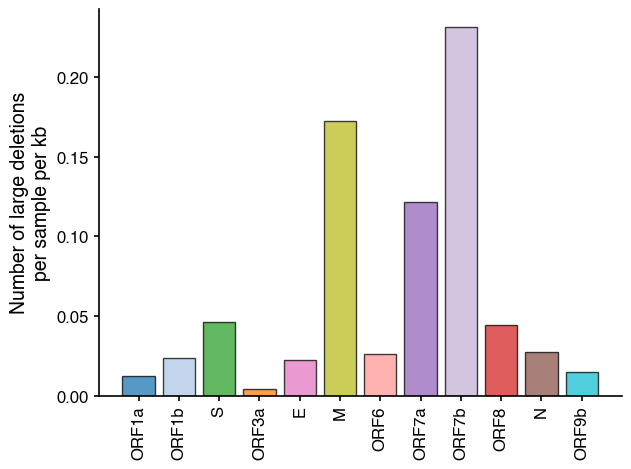

In [52]:
plot_bar(ko_df_ampl,'BigDeletion','Number of large deletions\nper sample per kb',norm=True,path='figs/supplemental/ko_bigdeletion_norm.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 24647,
 'ORF1b': 28471,
 'S': 26485,
 'ORF3a': 509,
 'E': 757,
 'M': 17166,
 'ORF6': 710,
 'ORF7a': 6603,
 'ORF7b': 3368,
 'ORF8': 1517,
 'N': 5110,
 'ORF9b': 637}

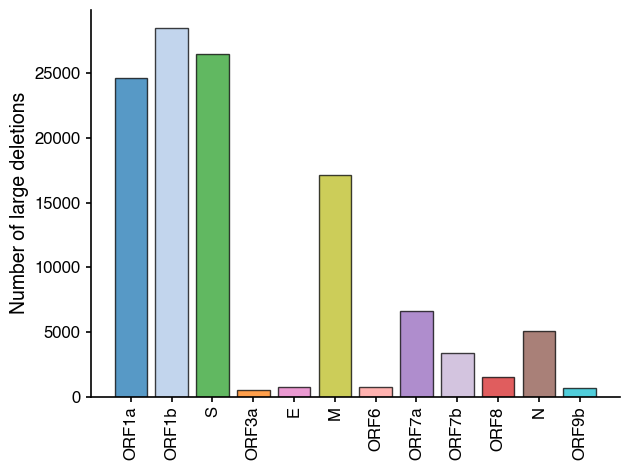

In [53]:
plot_bar(ko_df,'BigDeletion','Number of large deletions',norm=False)

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_45783/4255013662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 16073,
 'ORF1b': 19562,
 'S': 17375,
 'ORF3a': 341,
 'E': 604,
 'M': 9049,
 'ORF6': 475,
 'ORF7a': 4624,
 'ORF7b': 2336,
 'ORF8': 1054,
 'N': 2972,
 'ORF9b': 444}

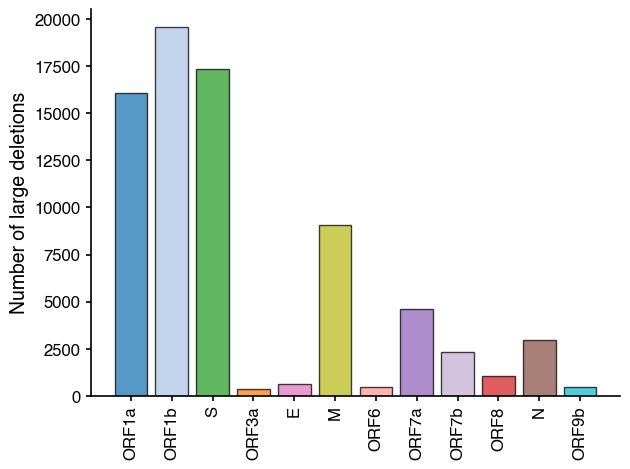

In [54]:
plot_bar(gb_ko,'BigDeletion','Number of large deletions',norm=False,path='figs/supplemental/ko_bigdeletion_genbank.pdf')

In [55]:
clusters_df_ampl = load_clusters('nextstrain_build/results/WA_20k/clusters_with_amplicon')
clusters_df = load_clusters('nextstrain_build/results/WA_20k/clusters/')

In [56]:
clusters_df.head()

,cluster,depth,clustSize,koType,gene
0,1,2,2,earlyStop,ORF1a
1,2,2,1,earlyStop,ORF1a
2,3,2,1,earlyStop,ORF1a
3,4,2,1,earlyStop,ORF1a
4,5,2,1,earlyStop,ORF1a


In [57]:
clusters_df.koType.unique()

array(['earlyStop', 'bigDeletion'], dtype=object)

In [58]:
np.average(clusters_df[(clusters_df.gene=='ORF8')&(clusters_df.clustSize>1)]['clustSize'])

34.264150943396224

In [59]:
np.average(clusters_df[(clusters_df.gene!='ORF8')&(clusters_df.clustSize>1)]['clustSize'])

3.120456165359943

In [60]:
st.mannwhitneyu(clusters_df[(clusters_df.gene=='ORF8')&(clusters_df.clustSize>1)]['clustSize'],clusters_df[(clusters_df.gene!='ORF8')&(clusters_df.clustSize>1)]['clustSize'],alternative='greater')

MannwhitneyuResult(statistic=47948.5, pvalue=1.3713577160677668e-05)

In [61]:
def plot_clusters(df,lab,koType=None,path=None,colordict=cdict,log=True):
    labs = genes.copy()
    locs = np.arange(len(genes))
    if koType:
        d = [df[(df.gene==gene)&(df.koType==koType)&(df.clustSize>1)]['clustSize'] for gene in genes]
        mean = [np.mean(df[(df.gene==gene)&(df.koType==koType)&(df.clustSize>1)]['clustSize']) for gene in genes]
        #d = [df[(df.gene==gene)&(df.koType==koType)]['clustSize'] for gene in genes]

    else:
        d = [df[(df.gene==gene)&(df.clustSize>1)]['clustSize'] for gene in genes]
        mean = [np.mean(df[(df.gene==gene)&(df.clustSize>1)]['clustSize']) for gene in genes]
        #d = [df[(df.gene==gene)&(df.clustSize>5)]['clustSize'] for gene in genes]


    fig,ax = plt.subplots(tight_layout=True,figsize=(5,4))
    for j,sizes in reversed(list(enumerate(d))):
        if not len(sizes):
            d.pop(j)
            locs = np.delete(locs,j)
            labs.pop(j)
    violins = ax.violinplot(d,locs,showextrema=False,showmedians=False, showmeans=True)
    for body, gene in zip(violins['bodies'],labs):
        body.set_facecolor(colordict[gene])
        body.set_edgecolor('black')
        body.set_alpha(0.7)
    colors = [colordict[gene] for gene in labs]
    violins['cmeans'].set_colors('k')
    ax.set_xticks(locs,labs)
    if log == True:
        ax.set_yscale('log')
    ax.set_xticklabels(labs,rotation=90)
    ax.set_ylabel(lab)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')
    return d,mean

In [88]:
def plot_figure(df1,df2, ylab,koType1=None,koType2=None,log=False,cov=0.95,path=None,colordict=cdict,title=None,norm=False):
    fig, ax = plt.subplots(nrows=2,tight_layout=True,figsize=(3.5,5.25),label=['A','B'])
    genes = []
    kos = []
    lengths = []
    colors = []
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            if koType1:
                ko = df1[df1.coverage>=cov][name+'_koType']
                kos.append(len(ko[(ko==koType1)]))
            else:
                ko = df1[df1.coverage>=cov][name+'_ko']
                kos.append(len(ko[ko=='Yes']))
            genes.append(name)
            lengths.append(length)
            colors.append(colordict[name])
    heights = np.asarray(kos)
    lengths = np.asarray(lengths)
    if norm == True:
        heights = heights/(lengths*len(df1))
    ax[0].bar(genes,heights,edgecolor='k',alpha=0.75,color=colors)
    ax[0].set_ylabel(ylab)
    ax[0].set_xticklabels(genes,rotation=90)
    ax[0].text(x=-5,y=13000,s='A',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})
    if log == True:
        ax[0].set_yscale('log')
        
    labs = genes.copy()
    locs = np.arange(len(genes))
    if koType2:
        d = [df2[(df2.gene==gene)&(df2.koType==koType)&(df2.clustSize>1)]['clustSize'] for gene in genes]
        mean = [np.mean(df2[(df2.gene==gene)&(df2.koType==koType)&(df2.clustSize>1)]['clustSize']) for gene in genes]
        #d = [df[(df.gene==gene)&(df.koType==koType)]['clustSize'] for gene in genes]

    else:
        d = [df2[(df2.gene==gene)&(df2.clustSize>1)]['clustSize'] for gene in genes]
        mean = [np.mean(df2[(df2.gene==gene)&(df2.clustSize>1)]['clustSize']) for gene in genes]
        #d = [df[(df.gene==gene)&(df.clustSize>5)]['clustSize'] for gene in genes]


    for j,sizes in reversed(list(enumerate(d))):
        if not len(sizes):
            d.pop(j)
            locs = np.delete(locs,j)
            labs.pop(j)
    violins = ax[1].violinplot(d,locs,showextrema=False,showmedians=False, showmeans=True)
    for body, gene in zip(violins['bodies'],labs):
        body.set_facecolor(colordict[gene])
        body.set_edgecolor('black')
        body.set_alpha(0.7)
    colors = [colordict[gene] for gene in labs]
    violins['cmeans'].set_colors('k')
    ax[1].set_xticks(locs,labs)
    ax[1].set_yscale('log')
    ax[1].set_xticklabels(labs,rotation=90)
    ax[1].set_ylabel('Knockout cluster size')
    ax[1].text(x=-4.5,y=1100,s='B',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})

    if title:
        ax[1].set_title(tile)
        
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

def get_kos_gene(ref, df1,koType1,cov=0.95,norm=False):
    cols = {'earlyStop':['nStops','nStops_norm'],
            'BigDeletion':['nDeletions','nDeletions_norm']}
    genes = []
    kos = []
    lengths = []
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            if koType1:
                ko = df1[df1.coverage>=cov][name+'_koType']
                kos.append(len(ko[(ko==koType1)]))
            else:
                ko = df1[df1.coverage>=cov][name+'_ko']
                kos.append(len(ko[ko=='Yes']))
            genes.append(name)
            lengths.append(length)
    heights = np.asarray(kos)
    lengths = np.asarray(lengths)
    
    df = pd.DataFrame({'gene':genes,cols[koType1][0]:heights})
    
    if norm == True:
        df[cols[koType1][1]] = 1000*heights/(lengths*len(df1))/3
        
    return df

def get_nsp_kos(ref,df,koType,cov=0.95,norm=False):
    cols = {'earlyStop':['nStops','nStops_norm'],
            'BigDeletion':['nDeletions','nDeletions_norm']}
    kos = []
    genes = []
    lengths = []
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            if 'Nsp' in name:
                start = feature.location.start
                end = feature.location.end
                if name == 'Nsp12':
                    length = len(ref.seq[13441:13468].translate(to_stop=True) + ref.seq[13467:16236].translate(to_stop=True))
                else:
                    length = len(ref.seq[start:end].translate(to_stop=True))
                ko = df[df.coverage>=cov][name+'_koType']
                kos.append(len(ko[(ko==koType)]))
                genes.append(name)
                lengths.append(length)
    heights = np.asarray(kos)
    lengths = np.asarray(lengths)
    
    new_df = pd.DataFrame({'protein':genes,cols[koType][0]:heights})
    
    if norm == True:
        new_df[cols[koType][1]] = 1000*heights/(lengths*len(df))/3
        
    return new_df

In [82]:
stops_gene = get_kos_gene(ref,ko_df_ampl,'earlyStop')
stops_gene.to_csv('figs/fig2/2A_SourceData.tsv',sep='\t',index=False)
deletions_gene = get_kos_gene(ref,ko_df_ampl,'BigDeletion',norm=True)
deletions_gene.to_csv('figs/supplemental/S3AB_SourceData.tsv',sep='\t',index=False)

In [89]:
nsp_stops = get_nsp_kos(ref_all,ko_all,'BigDeletion',norm=True)
nsp_stops.to_csv('figs/supplemental/S3C_SourceData.tsv',sep='\t',index=False)

In [70]:
clusters_df_ampl.head()

,cluster,depth,clustSize,koType,gene
0,1,2,2,earlyStop,ORF1a
1,2,2,1,earlyStop,ORF1a
2,3,2,1,earlyStop,ORF1a
3,4,2,1,earlyStop,ORF1a
4,5,2,1,earlyStop,ORF1a


In [67]:
clusters_df_ampl[['cluster','clustSize','gene']].to_csv('figs/fig2/2B_SourceData.tsv',sep='\t',index=False)

In [71]:
clusters_df_ampl[['cluster','clustSize','koType','gene']].to_csv('figs/supplemental/S3DE_SourceData.tsv',sep='\t',index=False)

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_21606/3045016244.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(genes,rotation=90)


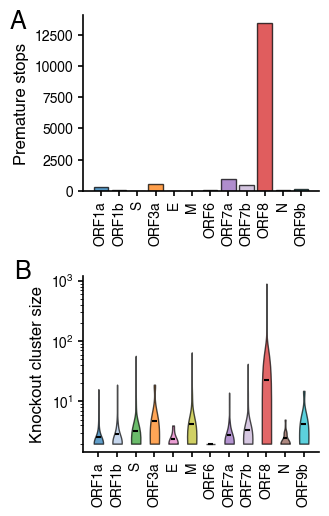

In [34]:
plot_figure(ko_df_ampl,clusters_df_ampl,'Premature stops',koType1='earlyStop',path='figs/fig2/Fig2.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_21606/3045016244.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(genes,rotation=90)


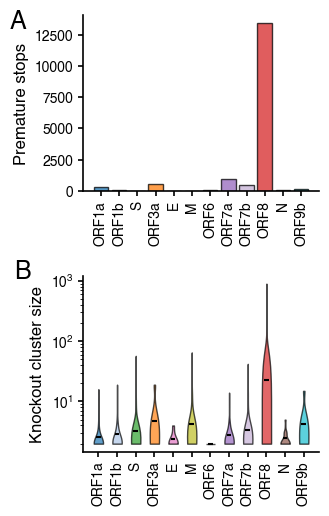

In [35]:
plot_figure(ko_df_ampl,clusters_df_ampl,'Premature stops',koType1='earlyStop',path='figs/fig2/Fig2.jpg')

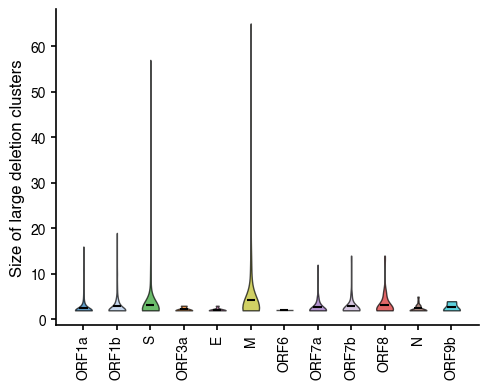

In [47]:
#plot_clusters(clusters_df,path='figs/fig2/clustSize.pdf')
d, mean = plot_clusters(clusters_df_ampl,'Size of large deletion clusters',koType='bigDeletion',log=False,path='figs/supplemental/clustSize_largeDeletion.pdf')

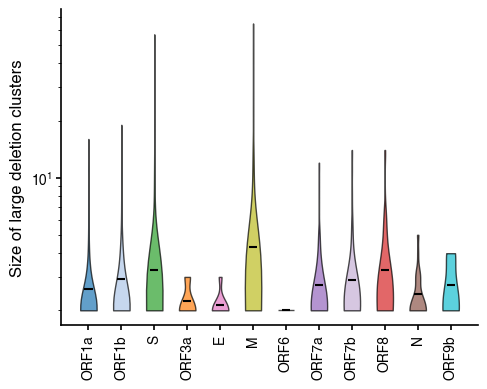

In [48]:
d, mean = plot_clusters(clusters_df_ampl,'Size of large deletion clusters',koType='bigDeletion',path='figs/supplemental/clustSize_largeDeletion_log.pdf')

In [49]:
len(d)
st.f_oneway(d[2],d[9],d[5])

F_onewayResult(statistic=2.2149932964413814, pvalue=0.11022210213798789)

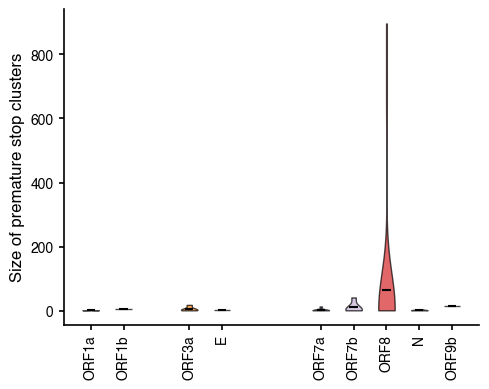

In [50]:
d, mean = plot_clusters(clusters_df_ampl,'Size of premature stop clusters',koType='earlyStop',log=False,path='figs/supplemental/clustSize_earlyStop.pdf')

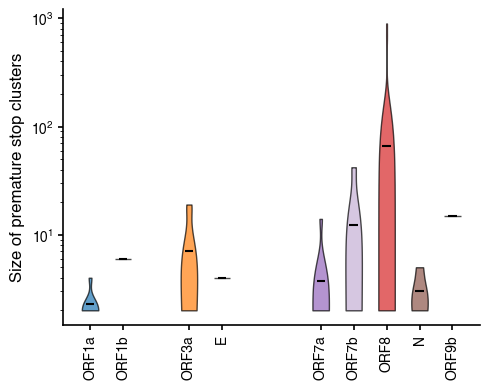

In [51]:
d, mean = plot_clusters(clusters_df_ampl,'Size of premature stop clusters',koType='earlyStop',path='figs/supplemental/clustSize_earlyStop_log.pdf')

In [39]:
clusters_df[clusters_df.gene=='ORF8'].sort_values(by='clustSize',ascending=False)

,cluster,depth,clustSize,koType,gene
4,5,21,896,earlyStop,ORF8
83,84,13,657,earlyStop,ORF8
27,28,7,33,earlyStop,ORF8
5,6,10,29,earlyStop,ORF8
64,65,6,15,earlyStop,ORF8
...,...,...,...,...,...
136,137,2,1,bigDeletion,ORF8
135,136,2,1,bigDeletion,ORF8
134,135,2,1,bigDeletion,ORF8
133,134,2,1,bigDeletion,ORF8


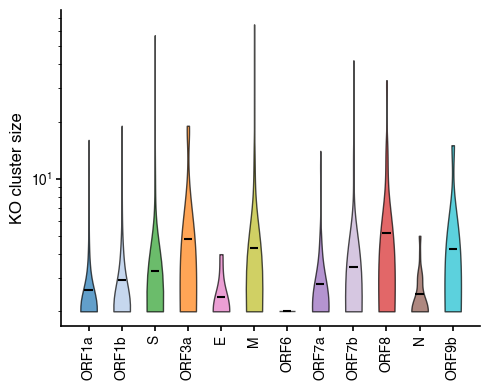

In [24]:
d,mean = plot_clusters(clusters_df[~((clusters_df.gene=='ORF8') & ((clusters_df.cluster==5)|(clusters_df.cluster==84)))], 'KO cluster size')

In [25]:
len(d)
st.f_oneway(d[3],d[9],d[5],d[11])

F_onewayResult(statistic=0.27113959558827894, pvalue=0.846183362869193)

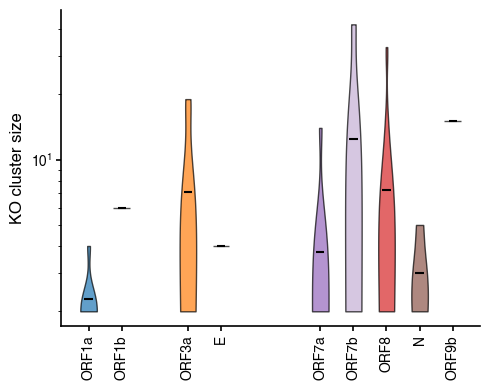

In [26]:
d,mean = plot_clusters(clusters_df[~((clusters_df.gene=='ORF8') & ((clusters_df.cluster==5)|(clusters_df.cluster==84)))], 'KO cluster size',koType='earlyStop')

In [28]:
len(d)
st.f_oneway(d[2],d[5],d[6])

F_onewayResult(statistic=0.6859658397220653, pvalue=0.5102457075300578)